# Feature Selection and Prediction (2 models)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
cancer = load_breast_cancer()

In [6]:
# get random values

In [7]:
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data),50))

In [8]:
# add noise features to the dataset
# the first 30 features are actual data
# the next 50 features are noise

In [9]:
X_w_noise = np.hstack([cancer.data,noise])

In [10]:
cancer.data.shape

(569, 30)

In [11]:
X_w_noise.shape

(569, 80)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(
            X_w_noise,cancer.target,random_state=0,test_size=0.5)

In [13]:
# use SelectPercentile to select 50% best features

In [14]:
from sklearn.feature_selection import SelectPercentile

In [15]:
select = SelectPercentile(percentile=50)
select.fit(X_train,y_train)
X_train_selected = select.transform(X_train)

In [16]:
X_train.shape

(284, 80)

In [17]:
X_train_selected.shape

(284, 40)

In [18]:
# identify selected columns

In [19]:
mask = select.get_support()
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
        True,  True, False,  True, False, False, False, False])

In [20]:
# visualize the mask, black is True, white is False

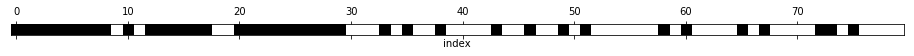

In [22]:
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel('index')
plt.yticks(());

In [23]:
# most of thee selected features come from the original dataset

### Performance of Logistic Regression with all and with the selected features

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
X_test_selected = select.transform(X_test)

In [26]:
lr = LogisticRegression(solver = 'liblinear')

In [27]:
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.9298245614035088

In [28]:
lr.fit(X_train_selected,y_train)
lr.score(X_test_selected,y_test)

0.9403508771929825

In [29]:
# removing noise features improved the test set performance

### Model-based Feature Selection

In [30]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [31]:
# model1 is a RandomForestClassifier

In [32]:
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),
                         threshold='median')
select.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold='median')

In [33]:
# extract selected features

In [35]:
X_train_l1 = select.transform(X_train)

In [36]:
X_train.shape

(284, 80)

In [37]:
X_train_l1.shape

(284, 40)

([], <a list of 0 Text yticklabel objects>)

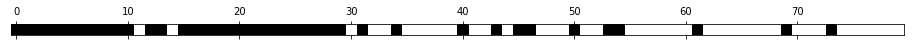

In [38]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.yticks(())

In [39]:
# model2 to predict test set

In [40]:
X_test_l1 = select.transform(X_test)
LogisticRegression(solver='liblinear').fit(X_train_l1,y_train)\
                                     .score(X_test_l1,y_test)

0.9508771929824561

### Recursive feature elimination (RFE)

In [41]:
# build a model with all features
# then based on the model, discard the least important
# repeat until a prespecified number of features is left

In [42]:
from sklearn.feature_selection import RFE

In [43]:
select = RFE(RandomForestClassifier(n_estimators = 100, random_state=42),
            n_features_to_select = 40)
select.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
  n_features_to_select=40, step=1, verbose=0)

([], <a list of 0 Text yticklabel objects>)

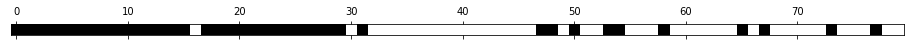

In [45]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.yticks(())

In [46]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

In [48]:
LogisticRegression(solver='liblinear').fit(X_train_rfe,y_train)\
                                      .score(X_test_rfe,y_test)

0.9508771929824561

In [49]:
# Compare against Random Forest predictions

In [50]:
select.score(X_test,y_test)

0.9508771929824561